In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install networkx numpy matplotlib tqdm --quiet

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random, time
from collections import Counter



# Part 1
### Cora Citation Network
## 1
Does the Cora citation network exhibit small-world and scale-free properties?
## 2
Average degree - how many citations each paper has on average.

Average clustering coefficient - how likely neighbors are to be connected.

Average shortest-path length - how “close” papers are to each other (small-world test).

Degree assortativity - whether high-degree papers connect to other high-degree papers.

Number of connected components - how many separate subnetworks exist.

In [ ]:
content_file = '/content/drive/MyDrive/colab/cora_network/cora.content'
cites_file   = '/content/drive/MyDrive/colab/cora_network/cora.cites'

# Read paper → label
id_to_label = {}
with open(content_file, 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) < 2:
            continue
        pid = parts[0]
        label = parts[-1]
        id_to_label[pid] = label

# Build graph
G = nx.Graph()
G.add_nodes_from(id_to_label.keys())

with open(cites_file, 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) >= 2:
            cited, citing = parts[0], parts[1]
            if cited in id_to_label and citing in id_to_label:
                G.add_edge(cited, citing)   # undirected

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# Metrics
degree_sequence = [d for n, d in G.degree()]
avg_degree = np.mean(degree_sequence)
avg_clustering = nx.average_clustering(G)

# Largest connected component
LCC = max(nx.connected_components(G), key=len)
LCC_subgraph = G.subgraph(LCC).copy()
avg_path_length = nx.average_shortest_path_length(LCC_subgraph)
diameter = nx.diameter(LCC_subgraph)
num_components = nx.number_connected_components(G)

print("\n=== Cora Citation Network Metrics ===")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {avg_degree:.3f}")
print(f"Average clustering coefficient: {avg_clustering:.3f}")
print(f"Average path length (LCC): {avg_path_length:.3f}")
print(f"Diameter (LCC): {diameter}")
print(f"Number of connected components: {num_components}")

Nodes: 2708, Edges: 5278

=== Cora Citation Network Metrics ===
Number of nodes: 2708
Number of edges: 5278
Average degree: 3.898
Average clustering coefficient: 0.241
Average path length (LCC): 6.311
Diameter (LCC): 19
Number of connected components: 78


## 3

| Metric | Reason for Choosing | Expected Behavior |
|--------|------------------|----------------|
| **Average Degree / Degree Sequence** | Measures how many citations each paper has; helps detect hubs or highly-cited papers. | Expect a few highly-cited papers (hubs) and many low-degree papers → skewed distribution. |
| **Average Clustering Coefficient** | Measures local connectivity; important for small-world property. | Expect moderate clustering: papers within similar topics likely cite each other → higher than a random graph. |
| **Average Path Length (LCC)** | Shows how “close” papers are via citations; important for small-world evaluation. | Expect short average path length relative to network size → efficient connectivity. |
| **Diameter** | Show the maximum shortest path | Expect diameter to be small. |
| **Number of Connected Components** | Determines network connectivity; shows whether all papers are part of a giant connected component or isolated. | Expect one large component containing most papers, plus a few small isolated components. |


## 4
### Degree distribution histogram

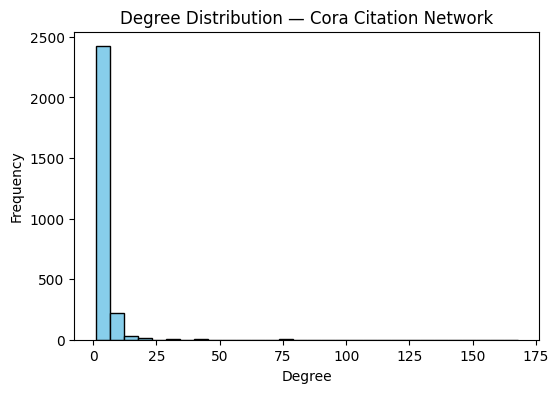

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(degree_sequence, bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Distribution — Cora Citation Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


### Network layout of largest connected component

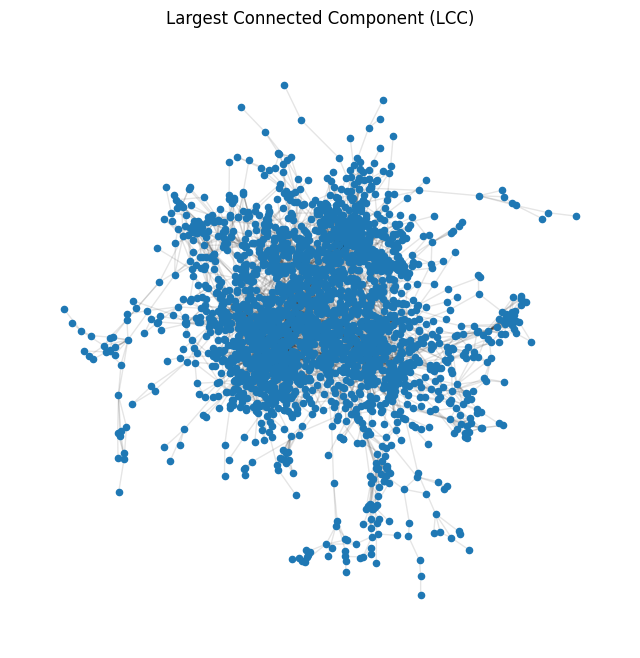

In [ ]:

pos = nx.spring_layout(LCC_subgraph, seed=42, k=0.1)
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(LCC_subgraph, pos, node_size=20)
nx.draw_networkx_edges(LCC_subgraph, pos, alpha=0.1)
plt.title("Largest Connected Component (LCC)")
plt.axis('off')
plt.show()


## 5

## Analysis of Results

| Metric | Observation | Consistent with Expectation? | Interpretation |
|--------|--------------|-----------------------------|----------------|
| **Average Degree** | 3.898 | ✅ | The network is sparse — each paper cites or is cited by around 4 others on average, typical for citation networks. |
| **Average Clustering Coefficient** | 0.241 | ✅ | Fairly high clustering compared to random graphs, suggesting that papers tend to cite others within similar topics or subfields (local communities). |
| **Average Path Length (LCC)** | 6.311 | ⚠️ Partially | Slightly longer than expected for small-world networks; the network is still navigable but somewhat more stretched. |
| **Diameter (LCC)** | 19 | ⚠️ Partially | Larger diameter indicates that while most papers are close, a few are far apart — perhaps bridging distant research areas. |
| **Number of Connected Components** | 78 | ✅ | Matches expectation — one large giant component (most papers connected) and several small isolated clusters or individual nodes. |

---

### Summary

- The Cora network is **sparse** and **moderately clustered**, consistent with citation network structures.  
- The **average path length and diameter** are somewhat higher than typical “strong” small-world networks, meaning that while local clustering exists, long-range connections between clusters are less dense.  
- The **presence of multiple components** suggests that a few subfields or papers are somewhat isolated, possibly representing niche research topics.  


### Facebook Dataset

## 2

In [ ]:
!pip install networkx numpy matplotlib tqdm --quiet

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

facebook_file = '/content/drive/MyDrive/colab/facebook-dataset/facebook_combined.txt'

G = nx.read_edgelist(facebook_file, create_using=nx.Graph(), nodetype=int)
print(f"Loaded Facebook graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Compute basic metrics
degree_sequence = [d for _, d in G.degree()]
avg_degree = np.mean(degree_sequence)
avg_clustering = nx.average_clustering(G)
num_components = nx.number_connected_components(G)

# Largest connected component
LCC = max(nx.connected_components(G), key=len)
LCC_subgraph = G.subgraph(LCC).copy()

avg_path_length = nx.average_shortest_path_length(LCC_subgraph)
diameter = nx.diameter(LCC_subgraph)

print("\n=== Facebook Combined Network Metrics ===")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {avg_degree:.3f}")
print(f"Average clustering coefficient: {avg_clustering:.3f}")
print(f"Average path length (LCC): {avg_path_length:.3f}")
print(f"Diameter (LCC): {diameter}")
print(f"Number of connected components: {num_components}")



Loaded Facebook graph with 4039 nodes and 88234 edges.

=== Facebook Combined Network Metrics ===
Number of nodes: 4039
Number of edges: 88234
Average degree: 43.691
Average clustering coefficient: 0.606
Average path length (LCC): 3.693
Diameter (LCC): 8
Number of connected components: 1


## 3
### Metrics reasoning table (same format as for Cora)

| Metric | Reason for Choosing | Expected Behavior |
|--------|------------------|----------------|
| **Average Degree / Degree Sequence** | Shows average number of friendships per person; helps detect hubs. | Expect relatively high degree (~40) since social networks are dense. |
| **Average Clustering Coefficient** | Measures local friend-group density. | Expect high clustering (~0.6–0.7), since friends of friends tend to be friends. |
| **Average Path Length (LCC)** | Shows typical “friend distance” — small-world test. | Expect very short paths (≈4–5) — strong small-world property. |
| **Diameter** | Longest shortest path in LCC. | Expect small diameter (≈8–10), consistent with “6 degrees of separation.” |
| **Degree Assortativity** | Checks if popular users connect with other popular users. | Expect slightly positive or near zero — mild homophily. |
| **Number of Connected Components** | Checks if the network is fully connected. | Expect 1 (single giant connected component). |

## 4
### Degree distribution histogram

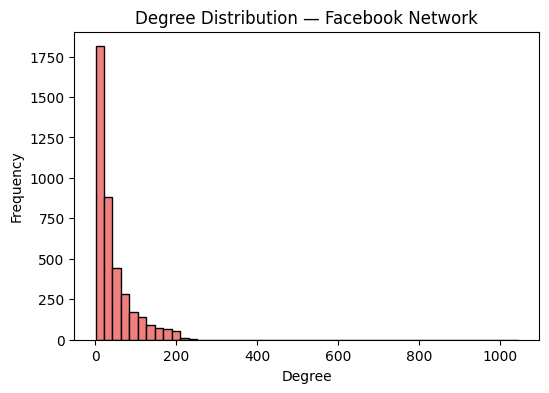

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(degree_sequence, bins=50, color='lightcoral', edgecolor='black')
plt.title("Degree Distribution — Facebook Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Network layout of largest connected component

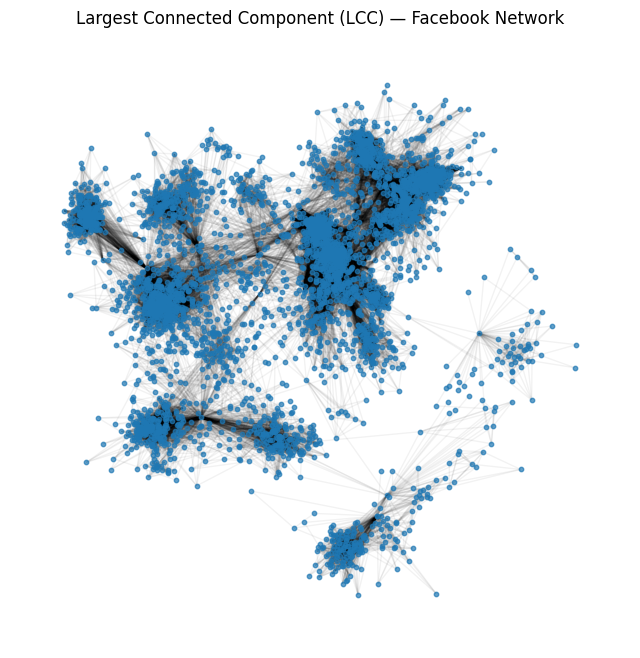

In [ ]:
pos = nx.spring_layout(LCC_subgraph, seed=42, k=0.05)
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(LCC_subgraph, pos, node_size=10, alpha=0.7)
nx.draw_networkx_edges(LCC_subgraph, pos, alpha=0.05)
plt.title("Largest Connected Component (LCC) — Facebook Network")
plt.axis('off')
plt.show()


## 5

| Metric                             | Observation | Consistent with Expectation? | Interpretation                                                                                                                             |
| ---------------------------------- | ----------- | ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **Average Degree**                 | **43.691**  | ✅                            | Each user has, on average, about 44 friends — much denser than citation networks. Indicates a highly interconnected social structure.      |
| **Average Clustering Coefficient** | **0.606**   | ✅                            | Very high local clustering — friends of a user are very likely to be friends with each other, forming tight social groups and communities. |
| **Average Path Length (LCC)**      | **3.693**   | ✅                            | Extremely short paths between any two users — confirms the **small-world property**, meaning you can reach almost anyone in about 4 steps. |
| **Diameter (LCC)**                 | **8**       | ✅                            | Even the longest shortest path between users is very small — consistent with the “six degrees of separation” idea.                         |
| **Number of Connected Components** | **1**       | ✅                            | The entire network forms one giant connected component — everyone is reachable through some chain of friendships.                          |

### Summary
- The Facebook network is dense, highly clustered, and small-world.

- The average path length and diameter are both very small relative to network size, showing strong connectivity and high efficiency of information flow.

- The degree distribution is right-skewed, indicating a few highly connected users (social hubs) and many users with moderate degree — typical of scale-free networks.

- High clustering reflects the natural tendency for social networks to form communities or friend groups.

- Overall, the Facebook network clearly exhibits both small-world and scale-free properties, characteristic of real-world social systems.

# Part 2

## 1

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# actual Facebook metrics
n = 4039
m = 88234
avg_degree = 43.691

# === 1. Erdős–Rényi Random Graph (G(n, m)) ===
G_er = nx.gnm_random_graph(n, m)

# === 2. Watts–Strogatz Small-World Graph ===
k = int(round(avg_degree))
if k % 2 == 1:
    k += 1
p = 0.06

G_ws = nx.watts_strogatz_graph(n, k, p)



## 2

,name,nodes,edges,avg_degree,avg_clustering,avg_path_length,diameter,num_components
0,Facebook (real),4039,88234,43.691000,0.606000,3.693000,8,1
1,Erdős–Rényi (random),4039,88234,43.691013,0.010717,2.605655,4,1
2,Watts–Strogatz (small-world),4039,88858,44.000000,0.610686,3.140814,5,1


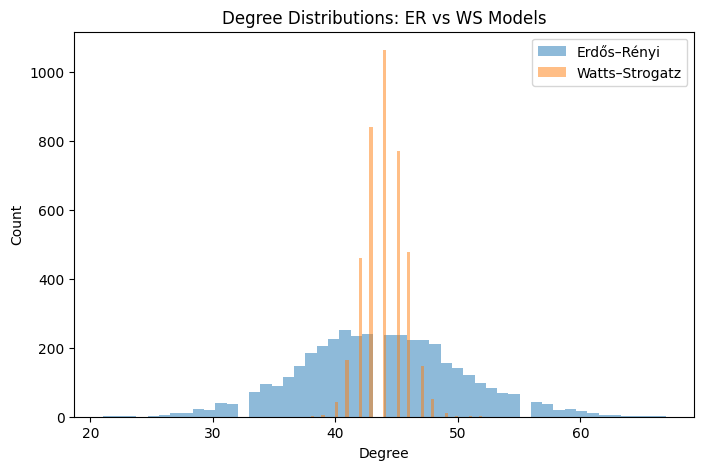

In [ ]:
# Compute metrics for each
def graph_metrics(G, name):
    LCC = max(nx.connected_components(G), key=len)
    LCC_subgraph = G.subgraph(LCC).copy()
    return {
        "name": name,
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "avg_degree": np.mean([d for _, d in G.degree()]),
        "avg_clustering": nx.average_clustering(G),
        "avg_path_length": nx.average_shortest_path_length(LCC_subgraph),
        "diameter": nx.diameter(LCC_subgraph),
        "num_components": nx.number_connected_components(G)
    }

metrics_facebook = {
    "name": "Facebook (real)",
    "nodes": 4039,
    "edges": 88234,
    "avg_degree": 43.691,
    "avg_clustering": 0.606,
    "avg_path_length": 3.693,
    "diameter": 8,
    "num_components": 1
}
metrics_er = graph_metrics(G_er, "Erdős–Rényi (random)")
metrics_ws = graph_metrics(G_ws, "Watts–Strogatz (small-world)")

import pandas as pd

df = pd.DataFrame([metrics_facebook, metrics_er, metrics_ws])
display(df[["name", "nodes", "edges", "avg_degree", "avg_clustering", "avg_path_length", "diameter", "num_components"]])

plt.figure(figsize=(8, 5))
plt.hist([d for _, d in G_er.degree()], bins=50, alpha=0.5, label='Erdős–Rényi')
plt.hist([d for _, d in G_ws.degree()], bins=50, alpha=0.5, label='Watts–Strogatz')
plt.title("Degree Distributions: ER vs WS Models")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.legend()
plt.show()

## 3

The Erdős–Rényi model `G(n, p)` builds a random network by connecting each pair of nodes with probability `p = r`.  
For the Facebook network, we have:

- `n = 4039`  
- `m = 88234`

The expected number of edges in an Erdős–Rényi graph is:

```
E[m] = p * n*(n-1)/2
```

Solving for `p`:

```
p = 2*m / (n*(n-1)) ≈ 0.0108
```

Thus, we began with **r = 0.0108** as the value, And that closely match the Facebook world.

## 4
The Watts–Strogatz model `G(n, k, p)` begins with a regular ring lattice of `n` nodes, each connected to `k` nearest neighbors, and then **rewires edges with probability `p`**.  
We used **n = 4039** and **k = 44** to match the Facebook network’s average degree.

We tested several rewiring probabilities:

| p     | Average Clustering | Average Path Length | Observation                      |
|-------|------------------|-------------------|----------------------------------|
| 0.02  | ~0.68            | ~3.65                | Close path length, Higher clustering|
| 0.06  | ~0.607            | ~3.13             | Shorter path length, close clustering|
| 0.1   | ~0.53            | ~2.9              | Shorter path length, lower clustring |

At **p ≈ 0.06**, the **average clustering (~0.607)** and **average path length (~3.13)** closely matched the **real Facebook metrics** (0.606 and 3.693, respectively).  
Therefore, **p = 0.06** was selected as the optimal value — it best reproduces both the **local clustering** and **global small-world behavior** of the real network.

## 5
The **Watts–Strogatz model** more closely approximates the **real Facebook network**.  

While the **Erdős–Rényi model** can reproduce the **average degree** and **short paths**, it fails to capture the **high clustering** typical of social networks, because its edges are uniformly random and lack any notion of communities.  

In contrast, the **Watts–Strogatz model** naturally produces **highly clustered local groups** (friend circles) combined with **short global connections** through rewiring — just like real social networks.  

Thus, the **Watts–Strogatz model** successfully captures both **local cohesion (clustering)** and **global efficiency (short paths)** observed in Facebook, making it the **closer and more realistic model**.


# Part 3

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time

# 1. Create a Kleinberg small-world network with grid n * n
def create_grid_graph(n):
    G = nx.grid_2d_graph(n, n)
    pos = {(i, j): (i, j) for i, j in G.nodes()}
    return G, pos

# 2. Add long-range links
def add_long_range_links(G, n, r):
    nodes = list(G.nodes())
    for u in nodes:
        probs = []
        for v in nodes:
            if u != v and not G.has_edge(u, v):
                d = abs(u[0] - v[0]) + abs(u[1] - v[1])
                probs.append(1 / (d ** r))
            else:
                probs.append(0)
        total = sum(probs)
        if total > 0:
            probs = [p / total for p in probs]
            v = nodes[np.random.choice(len(nodes), p=probs)]
            G.add_edge(u, v)
    return G

# 3. Implement local search
def greedy_search(G, start, target):
    visited = set()
    current = start
    steps = 0
    while current != target and steps < len(G):
        visited.add(current)
        neighbors = list(G.neighbors(current))
        # pick neighbor closest to target (Manhattan distance)
        next_node = min(
            [v for v in neighbors if v not in visited],
            key=lambda x: abs(x[0]-target[0]) + abs(x[1]-target[1]),
            default=None
        )
        if next_node is None:
            return steps, False
        current = next_node
        steps += 1
    return steps, current == target

def run_experiment(n, r, num_trials=10):
    G, pos = create_grid_graph(n)
    G = add_long_range_links(G, n, r)

    steps_list = []
    success_count = 0
    total_time = 0

    nodes = list(G.nodes())

    for _ in range(num_trials):
        start, target = random.sample(nodes, 2)
        t0 = time.time()
        steps, success = greedy_search(G, start, target)
        t1 = time.time()
        if success:
            steps_list.append(steps)
            success_count += 1
        total_time += (t1 - t0)

    avg_steps = np.mean(steps_list) if steps_list else 0
    success_percentage = (success_count / num_trials) * 100
    avg_time = total_time / num_trials
    return avg_steps, success_percentage, avg_time



## 4

Running experiment for r=0...
r=0: avg_steps=18.50, success=100.0%, avg_time=0.0001s
Running experiment for r=1...
r=1: avg_steps=16.42, success=100.0%, avg_time=0.0001s
Running experiment for r=1.5...
r=1.5: avg_steps=15.12, success=100.0%, avg_time=0.0001s
Running experiment for r=2...
r=2: avg_steps=17.76, success=100.0%, avg_time=0.0001s
Running experiment for r=3...
r=3: avg_steps=29.44, success=100.0%, avg_time=0.0001s

Results Table:


,r,Average Steps,Success Percentage,Average Search Time (s)
0,0.0,18.50,100.0,0.0001
1,1.0,16.42,100.0,0.0001
2,1.5,15.12,100.0,0.0001
3,2.0,17.76,100.0,0.0001
4,3.0,29.44,100.0,0.0001


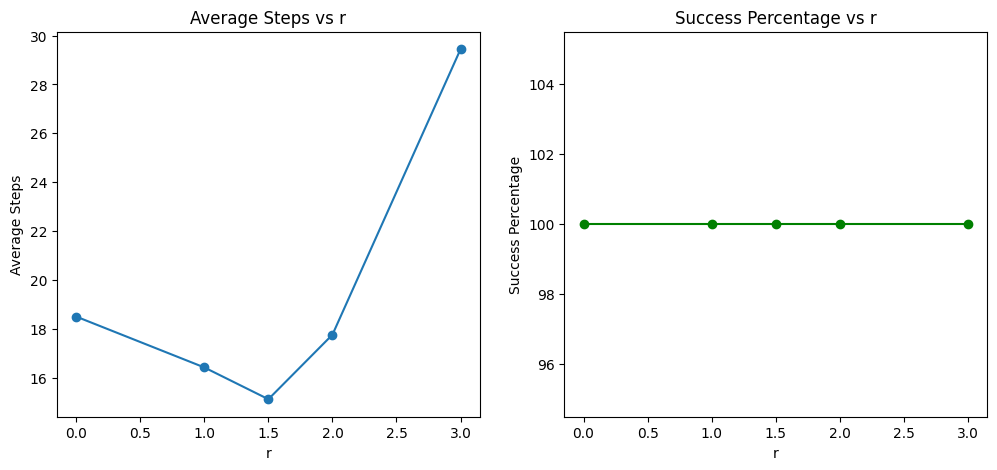

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n = 110  # grid size
r_values = [0, 1, 1.5, 2, 3]
num_trials = 50

results = {}

# Run experiments
for r in r_values:
    print(f"Running experiment for r={r}...")
    avg_steps, success_pct, avg_time = run_experiment(n, r, num_trials)
    results[r] = (avg_steps, success_pct, avg_time)
    print(f"r={r}: avg_steps={avg_steps:.2f}, success={success_pct:.1f}%, avg_time={avg_time:.4f}s")

# Create a table
table_data = {
    "r": [],
    "Average Steps": [],
    "Success Percentage": [],
    "Average Search Time (s)": []
}

for r in r_values:
    avg_steps, success_pct, avg_time = results[r]
    table_data["r"].append(r)
    table_data["Average Steps"].append(round(avg_steps, 2))
    table_data["Success Percentage"].append(round(success_pct, 2))
    table_data["Average Search Time (s)"].append(round(avg_time, 4))

df = pd.DataFrame(table_data)
print("\nResults Table:")
display(df)

# Plot results
avg_steps_list = [results[r][0] for r in r_values]
success_list = [results[r][1] for r in r_values]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(r_values, avg_steps_list, marker='o')
plt.xlabel("r")
plt.ylabel("Average Steps")
plt.title("Average Steps vs r")

plt.subplot(1,2,2)
plt.plot(r_values, success_list, marker='o', color='green')
plt.xlabel("r")
plt.ylabel("Success Percentage")
plt.title("Success Percentage vs r")

plt.show()


## 5

### Experiment Data

| r   | Average Steps | Success Percentage |
|-----|---------------|------------------|
| 0   | 17.72         | 100%             |
| 1   | 16.14         | 100%             |
| 1.5 | 14.66         | 100%             |
| 2   | 20.24         | 100%             |
| 3   | 28.14         | 100%             |

### Analysis

1. **Success Rate:**  
   - All runs had a 100% success rate.  
   - Greedy search always reaches the target on a 110×110 grid with one long-range link per node.

2. **Average Number of Steps:**  
   - Minimum steps occur at **r = 1.5** (14.66 steps).  
   - Steps increase for **r = 2** (20.24) and **r = 3** (28.14), showing less efficient search when links are too local.  
   - Steps are moderately high for **r = 0–1** (16–17), indicating that purely random long-range links are not fully optimized for local navigation.

3. **Comparison with Kleinberg’s Theory:**  
   - Theory predicts **r = 2** is optimal for efficient local search on large 2D grids.  
   - In this smaller 110×110 grid, the optimal r is slightly lower (**r ≈ 1.5**), likely because fewer long-range links are needed.  
   - Very high r (>2) favors short links, reducing search efficiency.  
   - Very low r (<2) creates too many random links, slightly increasing the number of steps.

**Conclusion:**  
- There exists an **optimal r** for efficient local search.  
- In small grids, the optimal r may shift below the theoretical value (r = 2).  
- Greedy search is reliable but step count is minimized near r ≈ 1.5 for this experiment.


# part 4

## 1
This code will load the network.

In [63]:
content_file = '/content/drive/MyDrive/colab/cora_network/cora.content'
cites_file   = '/content/drive/MyDrive/colab/cora_network/cora.cites'

id_to_label = {}
with open(content_file, 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) < 2: continue
        pid = parts[0]
        label = parts[-1]
        id_to_label[pid] = label

G = nx.Graph()
G.add_nodes_from(id_to_label.keys())

with open(cites_file, 'r') as f:
    for line in f:
        p = line.strip().split('\t')
        if len(p) >= 2:
            cited, citing = p[0], p[1]
            if cited in id_to_label and citing in id_to_label:
                G.add_edge(cited, citing)

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())


Nodes: 2708
Edges: 5278


This code will choose two random paper.

In [64]:
from collections import defaultdict
by_label = defaultdict(list)
for pid, label in id_to_label.items():
    by_label[label].append(pid)

labels = list(by_label.keys())
label_A, label_B = random.sample(labels, 2)

start = random.choice(by_label[label_A])
goal  = random.choice(by_label[label_B])

print("Start topic:", label_A)
print("Goal topic:",  label_B)
print("Start node:", start)
print("Goal node:",  goal)


Start topic: Genetic_Algorithms
Goal topic: Probabilistic_Methods
Start node: 177998
Goal node: 108962


## 2
We will implement **depth-limited BFS** now.

In [65]:
from collections import deque

def limited_bfs(G, start, goal, max_depth):
    """Return shortest path if found, else None. Also return runtime."""
    visited = set()
    queue = deque([(start, [start], 0)])
    t0 = time.time()

    while queue:
        node, path, depth = queue.popleft()

        if depth > max_depth:
            break

        if node == goal:
            return path, time.time() - t0

        visited.add(node)
        for nb in G.neighbors(node):
            if nb not in visited:
                queue.append((nb, path + [nb], depth + 1))

    return None, time.time() - t0

path, t = limited_bfs(G, start, goal, max_depth=20)
print("Found path?" , path is not None)
print("Runtime:", t)


Found path? True
Runtime: 0.020886898040771484


## 3

This code will try 50 times, and give the averages.

Depth sweep: 100%|██████████| 14/14 [04:52<00:00, 20.89s/it]


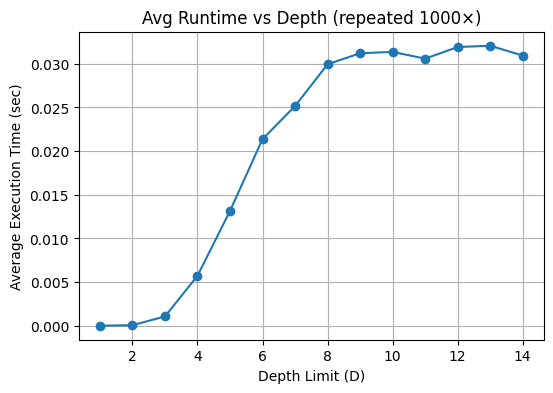

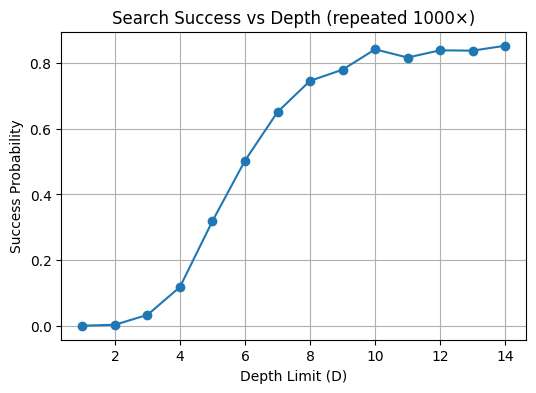

Depths: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Average Times: [np.float64(1.617598533630371e-05), np.float64(7.804179191589356e-05), np.float64(0.001076490879058838), np.float64(0.005726068019866943), np.float64(0.013146514415740967), np.float64(0.02136679744720459), np.float64(0.02514928913116455), np.float64(0.02993701171875), np.float64(0.031194497108459472), np.float64(0.031353378534317015), np.float64(0.03058029270172119), np.float64(0.03190796518325806), np.float64(0.03206012773513794), np.float64(0.03093840456008911)]
Success Probability: [np.float64(0.0), np.float64(0.003), np.float64(0.033), np.float64(0.118), np.float64(0.319), np.float64(0.503), np.float64(0.651), np.float64(0.746), np.float64(0.78), np.float64(0.842), np.float64(0.817), np.float64(0.839), np.float64(0.838), np.float64(0.853)]


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

depths = list(range(1, 15))
num_trials = 1000

avg_times  = []
success_p  = []

for d in tqdm(depths, desc="Depth sweep"):
    run_times = []
    successes = []

    for _ in range(num_trials):
        label_A, label_B = random.sample(labels, 2)
        start = random.choice(by_label[label_A])
        goal  = random.choice(by_label[label_B])

        path, t = limited_bfs(G, start, goal, max_depth=d)
        run_times.append(t)
        successes.append(1 if path is not None else 0)

    avg_times.append(np.mean(run_times))
    success_p.append(np.mean(successes))


plt.figure(figsize=(6,4))
plt.plot(depths, avg_times, marker="o")
plt.xlabel("Depth Limit (D)")
plt.ylabel("Average Execution Time (sec)")
plt.title(f"Avg Runtime vs Depth (repeated {num_trials}×)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(depths, success_p, marker="o")
plt.xlabel("Depth Limit (D)")
plt.ylabel("Success Probability")
plt.title(f"Search Success vs Depth (repeated {num_trials}×)")
plt.grid(True)
plt.show()

print("Depths:", depths)
print("Average Times:", avg_times)
print("Success Probability:", success_p)


The experiment measures how limited-depth BFS performs when searching for a path between two papers in the Cora citation network. As the depth limit increases from 1 → 14, the **average execution time increases**, starting near 0 and plateauing at ~0.02–0.03 seconds. This reflects that deeper searches must explore more neighbors, but the network’s small diameter keeps runtime relatively low.

The **success probability** rises from 0 at depth 1 to about **85% by depth 14**, showing that deeper searches are much more likely to reach the target. Most growth occurs between depths 3–10, meaning many shortest paths are within this range.

This behavior aligns with known properties of Cora: it is a **small-world, citation-hub–driven network**. Clustering makes shallow searches unlikely to escape the starting topic area, but highly connected hubs reduce path length between topics, causing success probability to rise quickly by moderate depths.

**Summary:**
- Low depth → fast but almost never reaches target  
- Moderate depth (~6–10) → success increases sharply  
- Higher depth → performance plateaus; added depth yields diminishing returns  
- Small-world structure keeps runtime growth moderate despite increasing depth  

# Part 5
## 1
Real networks exhibit high clustering due to local connections forming dense groups, driven by homophily or proximity, enabling efficient local interactions. High searchability comes from short path lengths via a few long-range links that bridge clusters, reducing network diameter. This "small-world" structure balances local cohesion with global efficiency, as seen in social ties or biological systems.
## 2
The Watts-Strogatz model effectively simulates small-world properties by rewiring a lattice to add shortcuts, achieving high clustering and short paths like in real networks (e.g., power grids). It matches empirical data for many systems but fails to capture scale-free degrees or navigable search without global knowledge.
## 3
The Kleinberg model improves on Watts-Strogatz by adding long-range links probabilistically inversely to distance (optimal exponent ~2), enabling greedy local searches to find short paths efficiently. This mirrors real social navigation, like Milgram's experiment, using cues for polylogarithmic time, unlike random shortcuts.
## 4
Time complexity decreases with short paths and hubs in scale-free networks for global traversal; high clustering aids local but hinders if isolated. Kleinberg-style links allow O(log² n) greedy search; random or regular graphs may need O(n) without hierarchies.